### HR analytics

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
hr_df = pd.read_excel('Documents/Data-Science/HR_analytics/Employee-Attrition.xlsx')
print('data has {} rows and {} columns'.format(hr_df.shape[0], hr_df.shape[1]))
hr_df.head()

data has 1470 rows and 35 columns


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
hr_df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [29]:
hr_df.groupby(['JobRole']).groups.keys()

dict_keys(['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'])

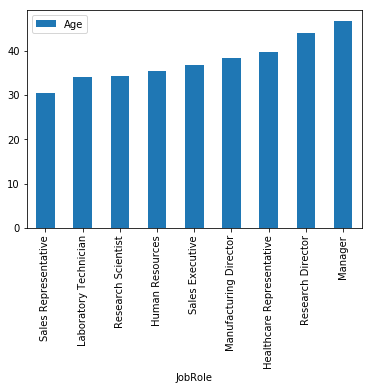

In [44]:
# What is the average age of employees at different JobRole groups?
age = hr_df.groupby('JobRole')[['Age']].mean().sort_values('Age')
age.plot(kind='bar')

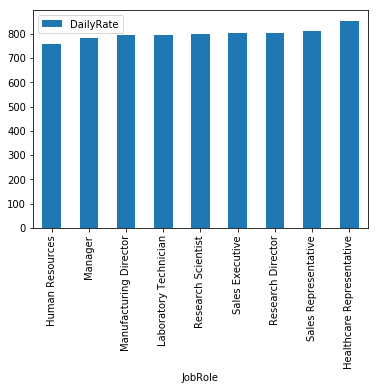

In [48]:
# What is the average DailyRate of employees at different JobRole groups?
dailypay = hr_df.groupby('JobRole')[['DailyRate']].mean().sort_values('DailyRate')
dailypay.plot(kind='bar')
# dailypay

In [52]:
# How many members are there per group when grouping by JobRole?
hr_df.groupby('JobRole')[['Age']].count().sort_values('Age')

,Age
JobRole,
Human Resources,52
Research Director,80
Sales Representative,83
Manager,102
Healthcare Representative,131
Manufacturing Director,145
Laboratory Technician,259
Research Scientist,292
Sales Executive,326


### Load another dataset

In [54]:
hr_df = pd.read_csv('Documents/Data-Science/HR_analytics/recruitment_data.csv')
print('data has {} rows and {} columns'.format(hr_df.shape[0], hr_df.shape[1]))
hr_df.head()

data has 446 rows and 4 columns


,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


#### Which recruiting source resulted highest sales quota retainment?
Sales quota attainment is how much a salesperson sold last year relative to their quota. An employee whose sales_quota_pct equals .75 sold 75% of their quota, for example. This metric can be helpful because raw sales numbers are not always comparable between employees.

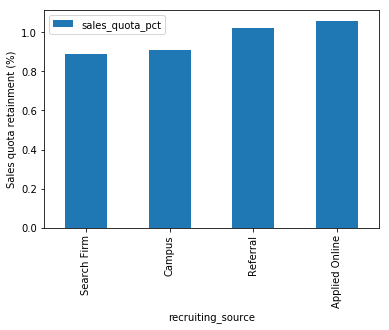

In [72]:
# Which recruiting source resulted highest sales_quota_pct?
salesQuotaPct = hr_df.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values('sales_quota_pct')
salesQuotaPct.plot(kind ='bar')
plt.ylabel('Sales quota retainment (%)')
plt.show()

Talents who applied online higher average sales_quota_pct than others, but the difference is small.

#### Which recruiting source resulted in highest perfromance rating?

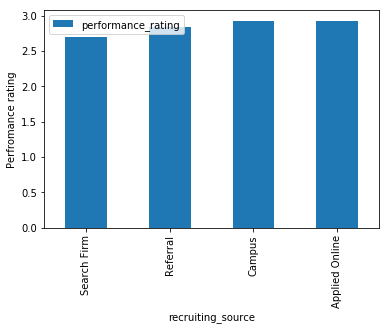

In [69]:
perf = hr_df.groupby('recruiting_source')[['performance_rating']].mean().sort_values('performance_rating')
perf.plot(kind ='bar')
plt.ylabel('Perfromance rating')
plt.show()

This shows that the perfromance rating  of the employees who were hired via "Applied Online" channel is higher than the rest. However the differences are small and a statistical test is required to study the significance of the differences.

#### Which hires had lower attrition rate?
Another quality of hire metric you can consider is the attrition rate, or how often hires leave the company. 

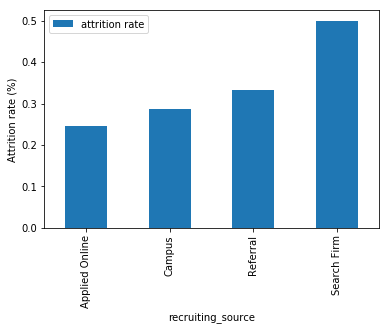

In [96]:
# att_rate = hr_df.groupby('recruiting_source')[['attrition']].sum().sort_values('attrition')
att_df = hr_df.groupby('recruiting_source')[['attrition']].sum()
att_df['head count'] = hr_df.groupby('recruiting_source')[['attrition']].count()
# x = pd.DataFrame(att_df['attrition']/att_df['head count'])
# x
att_df['attrition rate'] = att_df['attrition']/att_df['head count']
att_df.sort_values('attrition rate', ascending=True, inplace = True)
att_df[['attrition rate']].plot(kind='bar')
plt.ylabel('Attrition rate (%)')
plt.show()

This shows how attrition rate is highest for hires coming through Search Firms, while lowest for hires coming from "Applied Online".

### Visualizing recruiting data

Plot the differences you found between the groups